Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline
from IPython.display import Image

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

# Rotation d'une barre inclinée

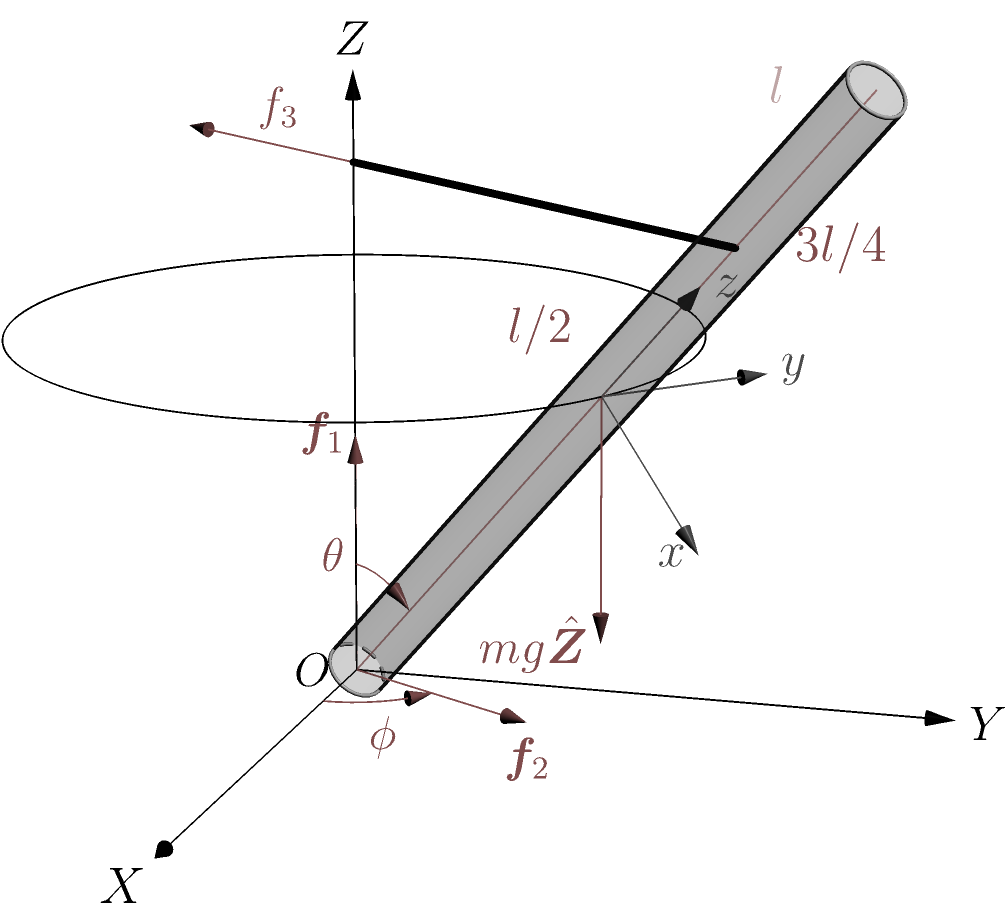

In [23]:
Image(filename='barre_z.png', width=500)

Une barre de masse $m$ et de longueur $l$ est fixée au point $O=(0,0,0)$ d'un repère fixe $(X,Y,Z)$. Elle est inclinée d'un angle $\theta=\mathrm{const.}$, tenue par une barre horizontale (parallèle au plan $XY$, et de masse négligeable), et elle tourne autour de l'axe $Z$. 

La barre tourne à vitesse angulaire constante $\dot\phi=\omega_0$.


### Définition des angles $(\theta,\phi)$

On note $\theta,\phi$ les angles des *coordonnées sphériques* (différents des angles d'Euler). 

Pour passer du repère fixe $(X,Y,Z)$ au mobile $(x,y,z)$ on fait deux rotations:
* rotation d'angle $\phi$ autour de l'axe $Z$, $R_z(\phi)$; le nouveau repère est $(n,y,Z)$
* rotation d'angle $\theta$ et axe $\hat{\bm Y}$, $R_y(\theta)$; on obtient le repère $(x,y,z)$ attaché à la barre (mobile).
la matrice de passage est donc
$$
R(\theta,\phi) = R_z(\phi)R_y(\theta)
$$
(on utilise l'expression de matrices de rotation selon les axes de la base canonique):
$$
R(\theta,\phi) =  R_Z(\phi)R_Y(\theta) = \begin{pmatrix}
\cos\theta \cos\phi & -\sin\phi & \sin\theta \cos\phi \\
\cos\theta \sin\phi & \cos\phi & \sin\theta \sin\phi \\
-\sin\theta & 0 & \cos\theta \end{pmatrix}
$$
Notez que les *colonnes* de cette matrice correspondent aux vecteurs de la base mobile $(\hat{\bm x}, \hat{\bm y}, \hat{\bm z})$. En particulier $\hat{\bm z}$ est le vecteur unité dans la direction radiale des coordonnées sphériques; les deux autres vecteurs définissent le plan tangent à la sphère. La barre suit la direction radiale, qui correspond à son axe de symétrie.

On a aussi:
$$
\begin{gather*}
\hat{\bm n} = R_y(-\theta) \hat{\bm x} \\
\hat{\bm Z} = R_y(-\theta) \hat{\bm z} 
\end{gather*}
$$
les vecteurs de la base intermédiaire $(\hat{\bm n}, \hat{\bm y}, \hat{\bm Z})$.

La liaison qui contraint le mouvement, fixant la valuer de $\theta$, est dans la direction du vecteur $\hat{\bm n}$ (perpendiculaire à l'axe vertical fixe $\hat{\bm Z}$).

### Définition des forces

La force de gravité est
$$
\bm F_g = -mg \hat{\bm Z}
$$
elle est appliquée au centre de masse $\bm R$.

Les forces de réaction $\bm f_1$ et $\bm f_2$ s'appliquent au centre de rotation $O$ (origine de repères fixes et mobiles); $\bm f_3$ a la direction de la liaison:
$$
\begin{gather*}
\bm f_1 = f_1 \hat{\bm Z} \\
\bm f_2 = f_2 \hat{\bm n} \\
\bm f_3 = -f_3 \hat{\bm n}
\end{gather*}
$$
notez que $\bm f_3$ est appliquée sur un point de l'axe vertical à distance $(3l/2)\cos\theta$ de l'origine: comme pour la gravité, son moment n'est pas nul (voir la figure).

In [ ]:
# matrices de rotation

phi, theta, psi = sy.symbols("phi, theta, psi", real=True)

def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([1,0,0]), sy.Matrix([0,1,0]), sy.Matrix([0,0,1])

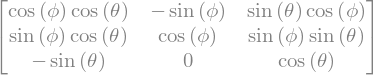

In [ ]:
# Matrice de passage
R = R_z(phi)*R_y(theta)
R

## Repère mobile


Le centre de masse se situe à une distance $\ell/2$ de l'origine $O$,
$$
\bm R = \frac{\ell}{2}\hat{\bm z}
$$
Le moment d'inertie (par rapport au centre $O$) est
$$I_x = I_y = I_l = \frac{m\ell^2}{3}, \; I_z = 0$$

La vitesse angulaire est
$$
\bm \Omega = \dot\phi \hat{\bm Z}.
$$
Dans le repère mobile on a $\hat{\bm Z} = R^T_y(\theta) \hat{\bm z}$
$$
\bm \Omega = \dot\phi \begin{pmatrix} -\sin\theta \\ 0 \\ \cos\theta \end{pmatrix} = -\dot\phi \sin\theta \hat{\bm x} + \dot\phi \cos\theta \hat{\bm z}.
$$

Le moment cinétique est simplement
$$\bm L = I \bm \Omega = \frac{m\ell^2 \dot\phi}{3} \sin\theta \hat{\bm x}$$

Enfin la dérivée par rapport au temps du moment cinétique est (vue du repère fixe)
$$
\frac{\D \bm L}{\D t} = I\dot{\bm \Omega} + \bm\Omega \wedge \bm L  = \frac{m\ell^2}{3} \begin{pmatrix} 
  0 \\ 
  -\frac{1}{2} \dot\phi^2 \sin(2\theta) \\
  0
\end{pmatrix}
$$
où on a mis $\ddot\phi=0$.

In [ ]:
m, g, l, omega_0 = sy.symbols("m, g, l, omega_0", real=True)

NameError: name 'sy' is not defined

In [ ]:
phi_t, phi_tt = sy.symbols("phi_t, phi_tt", real=True)

In [ ]:
e1, e2, e3 = XYZ() # base canonique
# vecteurs dans les coordonnées du repère mobile
en = R_y(-theta)*e1
eZ = R_y(-theta)*e3

In [ ]:
R_M = l/2*e3
R_M

In [ ]:
# moment d'inertie Io = Ix = Iy, Iz = 0
Io = m*l**2/3

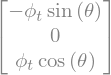

In [ ]:
# vitesse angulaire
O = phi_t * eZ
O

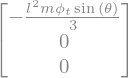

In [ ]:
# moment cinétique
L = Io*O[0]*e1 + Io*O[1]*e2
L

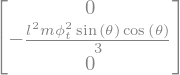

In [ ]:
oL = O.cross(L)
oL

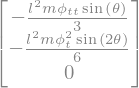

In [ ]:
Lt = sy.diff(L, phi_t)*phi_tt
sy.simplify(Lt + oL)

In [ ]:
f_1,f_2, f_3 = sy.symbols("f_1,f_2, f_3", real=True)

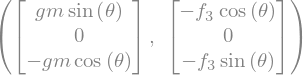

In [ ]:
# Moment de force M(f1) = 0
# gravité
Fg = -m*g*eZ
# réactions
f = -f_3*en
Fg, f

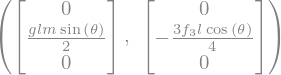

In [ ]:
Mg = R_M.cross(Fg)
Mf = sy.simplify(3*l/4*sy.cos(theta)*eZ.cross(f))
Mg, Mf

### Équation d'Euler

L'équation d'Euler
$$
\frac{\D \bm L}{\D t} = \bm M
$$
exprime le bilan du moment cinétique et de moment de forces $\bm M$ (couples ou torques) calculés par rapport à l'axe de rotation.

Seules la force de gravité $F_g$ et la liaison $f_3$ contribuent à $\bm M$, la force de réaction à l'origine a un moment nul:
$$
\bm M = \begin{pmatrix}
0 \\
\frac{mgl}{2} \cos\theta - \frac{3lf_3}{4} \cos\theta \\
0
\end{pmatrix}
$$
On obtient l'équation de moments:
$$
-\frac{ml^2}{3} \dot\phi^2 \sin\theta \cos\theta = \frac{mgl}{2} \cos\theta - \frac{3lf_3}{4} \cos\theta
$$
laquelle conduit à 
$$
f_3 = \frac{2mg}{3} \tan\theta + \frac{4m \dot\phi^2 l^2}{9}\sin\theta
$$
l'expression de la force de réaction $f_3$. On va obtenir le même résultat en travaillant dans le repère fixe. 

## Repère fixe

On présente le calcul dans le repère fixe.

Le centre de masse se situe à une distance $l/2$ de l'origine $O$, ses coordonnées sphériques sont $(l/2,\theta,\phi)$. On note
$$\bm n = \cos\phi \hat{\bm X} + \sin\phi \hat{\bm Y}$$
la projection sur le plan $XY$ de la direction du centre de masse.

Les axes du repère mobile sont (voir figure):
\begin{align}
\hat{\bm x} &= \cos\theta \bm n - \sin\theta \hat{\bm Z} \\
\hat{\bm y} &= -\sin\theta \hat{\bm X} + \cos\theta \hat{\bm Y}\\
\hat{\bm z} &= \sin\theta \bm n + \cos\theta \hat{\bm Z}
\end{align}
La matrice de rotation du repère mobile par rapport au repère fixe est donc,
$$R(\theta,\phi) = \begin{pmatrix}
\cos\theta \cos\phi & -\sin\phi & \sin\theta \cos\phi \\
\cos\theta \sin\phi & \cos\phi & \sin\theta \sin\phi \\
-\sin\theta & 0 & \cos\theta \end{pmatrix}$$

Notez que la matrice de rotation peut se décomposer selon la formule
$$R(\theta,\phi) = R_Z(\phi)R_Y(\theta)$$

In [ ]:
# cinétique
X, Y, Z = XYZ()
n = sy.cos(phi)*X + sy.sin(phi)*Y
y = R*Y
omega = omega_0*Z
r = (l/2)*(sy.sin(theta)*n + sy.cos(theta)*Z)
V = omega.cross(r)
a = -(l/2)*omega_0**2 * sy.sin(theta)*n

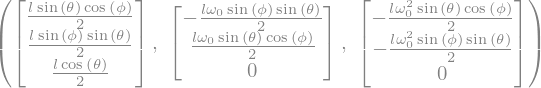

In [ ]:
r, V, a

Le vecteur centre de masse est
$$
\bm R = \frac{l}{2} \begin{pmatrix}
\sin\theta \cos\phi \\
\sin\theta \sin\phi \\
\cos\theta \end{pmatrix}
$$

La vitesse angulaire est
$$
\bm \omega = \omega_0 \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
$$

La vitesse du centre de masse est due à la rotation (constante):
$$
\bm V = \bm \omega \wedge \bm R = \frac{l\omega_0}{2}\sin\theta \begin{pmatrix} -\sin\theta \\ \cos\theta \\ 0 \end{pmatrix}
$$
(dans le repère mobile). L'accelération est
$$\dot{\bm V} =  -\frac{l\omega_0^2}{2}\sin\theta \begin{pmatrix} \cos\phi \\ \sin\phi \\ 0 \end{pmatrix}.
$$
(Notez que $\dot{\hat{\bm y}}=-\omega_0\bm n$, dans $(XYZ)$.)


### Moment cinétique

Le point délicat est le calcul du moment cinétique $\bm L$
$$
\bm L = m \bm R \wedge \bm V + I\bm \omega
$$
et de sa dérivée par rapport au temps
$$
\dot{\bm L} = m\bm R \wedge \dot{\bm V} + \bm\omega \wedge (I \bm\omega)
$$
Le problème est qu'on connaît les variables cinétiques dans le repère fixe, mais on a l'expression du moment d'inertie dans le centre de masse:
$$
I = \frac{ml^2}{12}\mathrm{diag}(1,1,0)
$$
On doit donc transformer le tenseur d'inertie du "centre de masse" en tenseur du repère "fixe":
$$
I_0 = RIR^T
$$
à l'aide donc de la matrice de rotation:
$$
I_0 = \frac{ml^2}{12} \begin{pmatrix}
1 - \sin^2\theta \cos^2\phi & -\sin^2\theta \sin2\phi & -1/2 \sin2\theta \cos\phi \\
-\sin^2\theta \sin2\phi & 1 - \sin^2\theta \sin^2\phi & -1/2 \sin2\theta \sin\phi \\
-1/2 \sin2\theta \cos\phi & -1/2 \sin2\theta \sin\phi & \sin^2\theta
\end{pmatrix}.
$$

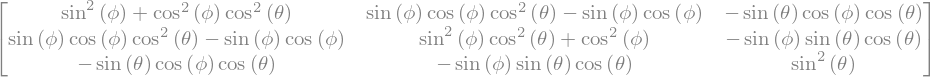

In [12]:
# tenseur I au repère fixe
RIR = R*sy.Matrix([[1,0,0],[0,1,0],[0,0,0]])*R.T
I_0 = (m*l**2/12)*RIR
RIR

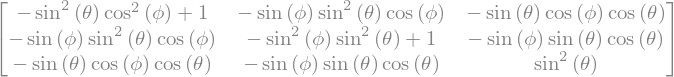

In [13]:
sy.expand(RIR.subs(sy.cos(theta)**2,1-sy.sin(theta)**2)).subs(sy.sin(phi)**2+sy.cos(phi)**2,1)

Les termes de l'équation d'Euler sont

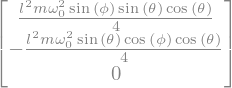

In [ ]:
# accélération
m*r.cross(a)

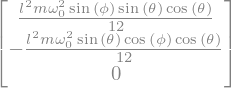

In [ ]:
# vitesse angulaire 
omega.cross(I_0*omega)

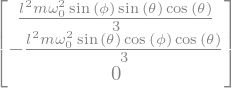

In [ ]:
# dérivée par rapport à t
Lt = m*r.cross(a) + omega.cross(I_0*omega)
Lt

La partie centre de masse donne:
$$
m\bm R \times \dot{\bm V} = -\frac{m\omega_0^2l^2}{4}\sin\theta\cos\theta \begin{pmatrix} -\sin\phi \\ \cos\phi \\ 0 \end{pmatrix}
$$
et la partie de rotation donne:
$$
\bm \omega \times (I\bm \omega) = -\frac{m\omega_0^2l^2}{12}\sin\theta \cos\theta\begin{pmatrix} -\sin\phi \\ \cos\phi \\ 0 \end{pmatrix}
$$
On a en définitive:
$$
\dot{\bm L} = -\frac{m\omega_0^2l^2}{3}\sin\theta \cos\theta \begin{pmatrix} -\sin\phi \\ \cos\phi \\ 0 \end{pmatrix}
$$

# Dynamique

## Équation de Newton

L'équation de Newton relie les accélérations du solide aux forces appliquées
$$m \bm a = \bm F$$
où $\bm F$ est la somme de forces et $\bm a$ l'accélération du centre de masse du solide.

La force totale (gravité et contraintes) est
$$\bm F = -mg \hat{\bm Z} + f_1 \hat{\bm Z} + f_2 \bm n - f_3 \bm n$$

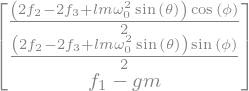

In [18]:
# force
F = -m*g*Z + f_1*Z + f_2*n - f_3*n
sy.simplify(F-m*a)

On obtient les équations pour $f_1$ et $f_2$ à partir de l'équation de Newton $\bm F = m \dot{\bm V}$:
$$f_1 = mg$$
et 
$$f_2 = f_3 - \frac{ml\omega_0^2}{2}\sin\theta$$

## Moment des forces

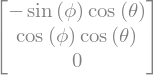

In [ ]:
z = R*Z
z.cross(n)

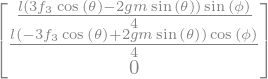

In [ ]:
M = sy.simplify(-3*l*f_3/4 * z.cross(n) + l/2*(-m*g) * z.cross(Z))
M

Le poids $mg$ et la corde $f_3$ exercent de moments:
$$\bm M = \frac{3l}{4}\hat{\bm z} \times (-\bm f_3) + \frac{l}{2}\hat{\bm z} \times (-mg)\hat{\bm Z}$$
ce qui donne:
$$
\bm M = \left(\frac{mgl}{2} \sin\theta y - \frac{3lf_3}{4} \cos\theta \right) \begin{pmatrix} -\sin\phi \\ \cos\phi \\ 0 \end{pmatrix}
$$
On se rappelle que dans le repère fixe on $\hat{\bm y} = -\sin\phi\hat{\bm X} + \cos\phi \hat{\bm Y}$, ce qui permet de comparer avec le résultat dans le repère mobile.

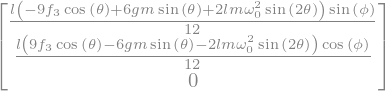

In [ ]:
sy.simplify(Lt - M)

## Équation d'Euler


Le théorème de Vargnon nous donne la forme explicite (dans le repère fixe)
$$\dot{\bm L} = \bm R \times (m\dot{\bm V}) + \bm \omega\times(I_0 \bm \omega) = \bm M$$
où on a utilisé que le terme d'accelération angulaire $\dot{\bm \omega}$ est nul. 

En utilisant l'expression de moments obtenue plus haut, on obtient une équation pour la force $\bm f_3$ (les composantes $X$ et $Y$ de l'équation donnenet la même solution):
$$
\frac{ml^2 \omega_0^2}{12} \cos\theta\sin\theta\sin\phi = \left(\frac{mgl}{2} \sin\theta -  \frac{3l^2}{4} f_3\cos\theta\right)\sin\phi
$$
ou en dégageant $f_3$:
$$
f_3 = \frac{2mg}{3} \tan\theta + \frac{4m\omega_0^2l^2}{9}\sin\theta
$$
Les autres forces sont
$$
f_1 = mg
$$
et
$$
f_2 = \frac{2mg}{3} \tan\theta - \frac{m\omega_0^2l^2}{18}\sin\theta
$$

On confirme dans le repère fixe les résultats du repère mobile.

# Code graphe

Le dessin de la barre utilise le package ["asymptote"](https://asymptote.sourceforge.io/index.html), lequel fait partie de $\TeX$. Il s'agit d'un langage statique, apparenté à C++. La compilation se fait par la commande `asy`:

`asy -f pdf fichier.asy`

où l'option `-f` force une sortie pdf (ou png ou svg, etc).


Voici le code (fichier "barre_z.asy"):

```cpp
import settings;
render = 4;
prc = false;

import three;
import solids;
texpreamble("\usepackage{bm}");

size(250, 0);

currentprojection  =  perspective(9, 3, 3);

pen pk = rgb(0, 0, 0);
pen pr = rgb(0.5, 0.3, 0.3);
pen pg = rgb(0.3, 0.3, 0.3);

// axes fixes
draw(Label("$X$", 1), O--X, pk, Arrow3);
draw(Label("$Y$", 1), O--Y, pk, Arrow3);
draw(Label("$Z$", 1), O--Z, pk, Arrow3);
label("$O$", O, 2*W);

// barre
real l = 1.6;
real a = 0.05;
real t = 45;
real theta = t*pi/180;
real q = 60;
real phi = q*pi/180;
triple ax = (sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta));
revolution C = cylinder(O, a, l, ax);

draw(surface(C),  gray(0.95)+opacity(0.2));
draw(C, 1bp+gray(0.7));
draw(O--l*ax, pr+opacity(0.5));

// axes mobiles (corps)
real b = 0.3;
triple r = b*(cos(phi)*X + sin(phi)*Y);
triple R = l/2*ax;
triple x = R + b*(cos(phi)*X + sin(phi)*Y)*cos(theta) - b*sin(theta)*Z;
triple y = R + b*(-sin(theta)*X + cos(theta)*Y);
triple z = R + b*ax;

draw(Label("$x$", 1, W), R--x, pg, Arrow3);
draw(Label("$y$", 1), R--y, pg, Arrow3);
draw(Label("$z$", EndPoint, align = E), R--z, pg, Arrow3);
label("$l$", l*ax+(0, -0.15, 0.0), pr+opacity(0.5));
label("$l/2$", 0.5*l*ax+(0, -0.1, 0.1), pr);

// rotation (arc de cercle)
//draw(arc(O, l/2, t, q, t, q+20),  pr);
draw(circle(O+l/2*cos(theta)*Z, l/2*sin(theta), Z), pk);
draw("$\phi$", arc(O, 0.6*b, 90, 0, 90, q),  pr, Arrow3);
draw(Label("$\theta$", N), arc(O, 0.6*b, 0, q, t, q),  pr, Arrow3);

// forces
real c = 0.4;
draw(Label("$\bm f_1$", 1, W), O--c*Z, pr, Arrow3);
draw(Label("$\bm f_2$", 1, S), O--c*(cos(phi), sin(phi), 0), pr, Arrow3);
draw(Label("$mg \hat{\bm Z}$", 1, W), R--(R-c*Z), pr, Arrow3);

// corde
real d = 3*l/4;
draw(Label("$3l/4$", EndPoint, 4*E, pr), (0,0,d*cos(theta))--(d*sin(theta)*cos(phi),d*sin(theta)*sin(phi),d*cos(theta)), 2bp+pk);
draw("$f_3$", (0,0,d*cos(theta))-- (-c*cos(phi),-c*sin(phi),d*cos(theta)), pr, Arrow3);
```